In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset from online source
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3: Preview the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill missing age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing)
df.drop(columns=['Cabin'], inplace=True)

# Check data types and structure
df.info()


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/tmp/ipython-input-2-1240513018.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2-1240513018.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [3]:
# Survival count
print("Survival count:\n", df['Survived'].value_counts())

# Survival by gender
print("\nSurvival by Gender:\n", df.groupby('Sex')['Survived'].mean())

# Average age by class
print("\nAverage Age by Pclass:\n", df.groupby('Pclass')['Age'].mean())

# Average fare by class
print("\nAverage Fare by Pclass:\n", df.groupby('Pclass')['Fare'].mean())


Survival count:
 Survived
0    549
1    342
Name: count, dtype: int64

Survival by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Average Age by Pclass:
 Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

Average Fare by Pclass:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


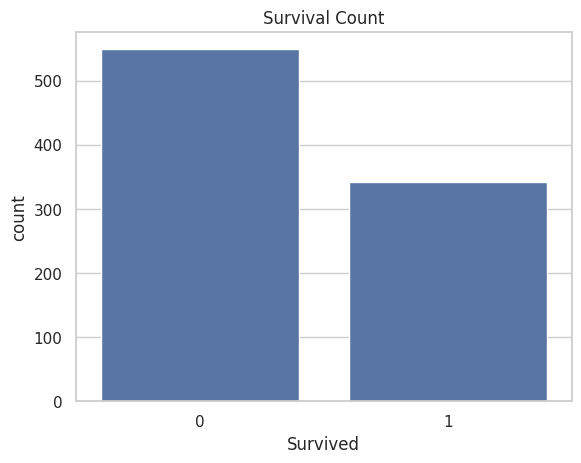

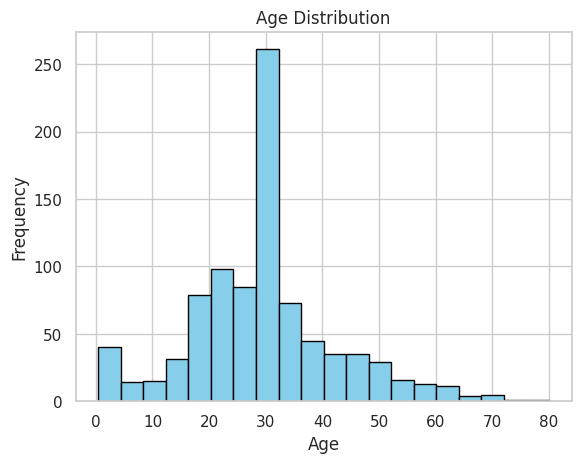

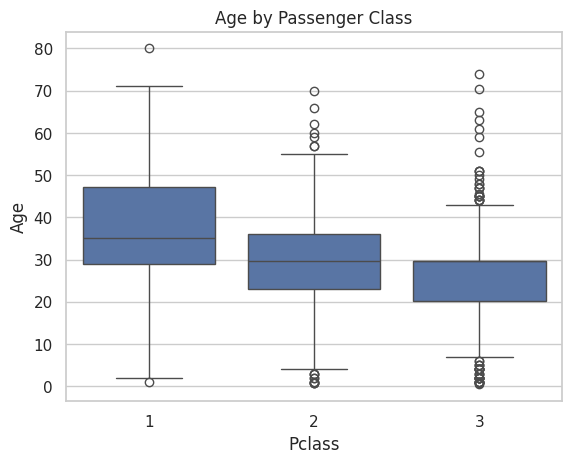

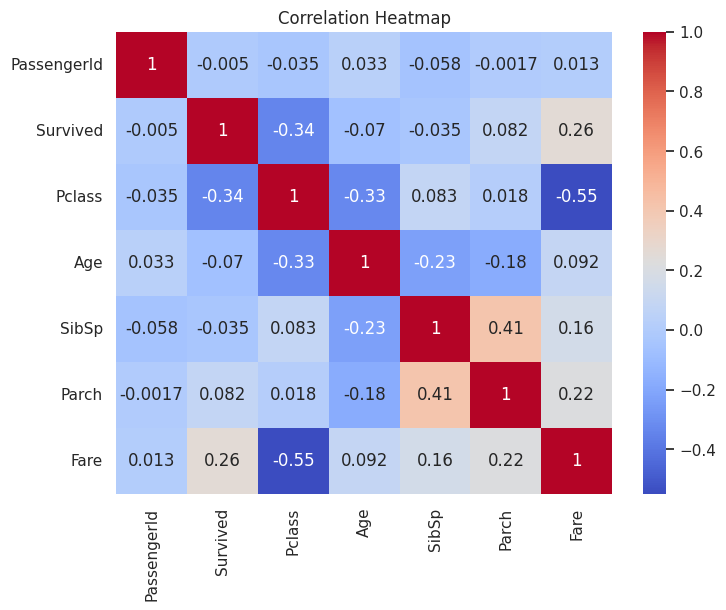

In [5]:
sns.set(style='whitegrid')

# Bar plot - survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Histogram - Age
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Box plot - Age by class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.show()

# Heatmap - Correlation
plt.figure(figsize=(8,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
## 🧾 Summary

- Females had a higher survival rate than males.
- Younger passengers and those in higher classes had better survival chances.
- Most missing values were found in 'Cabin' and 'Age'.
- Visualizations revealed strong correlations between survival and passenger class/gender.


SyntaxError: invalid syntax (ipython-input-13-1650799097.py, line 3)